## The Hungarian Algorithm 

The Hungarian algorithm is an algorithm used solve the linear sum assignment problem by minimizing a cost matrix of size n x n. This jupyter notebook will attempt to document the implementation of the Hungarian algorithm as it pertains to matching, or registering, 3D points from one matrix to 3D points in another matrix with the hopes of eventually applying the algorithm to real data sets in order to register individual synapses within an image across time. 

In [1]:
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
init_notebook_mode(connected = True)

## Hungarian Algorithm Implementation for Matrices of the Same Size - 3D Points

**Step 1:** To begin, create any n x 3 matrix. The matrix is of size n x 3 because this Jupyter notebook will document the registration of 3D points in two separate matrices. Below, I have created an n x 3 matrix, E. 

In [2]:
E = np.array([[1, 3, 1], [2, 5, 3], [2, 0, 1]])
print(E)

[[1 3 1]
 [2 5 3]
 [2 0 1]]


**Step 2:** Now, create another n x 3 matrix that is a permutation of E. In the case below, I have created F, an n x 3 matrix where the rows of E have been shuffled around. 

In [3]:
F = np.array([[2, 0, 1], [2, 5, 3], [1, 3, 1]])
print(F)

[[2 0 1]
 [2 5 3]
 [1 3 1]]


**Step 3:** The Hungarian algorithm works by minimizing a cost matrix. In order to apply the Hungarian algorithm, we must provide it with some cost matrix as an input. I have chosen to compute the Euclidean distance between pairwise points in matrices E and F and will use the n x n Euclidean distance matrix as the cost matrix. 

In [4]:
cost = cdist(E, F) #cdist is a scipy function that calculates the Euclidean distances between pairwise points in matrices E and F.
print(cost)

[[ 3.16227766  3.          0.        ]
 [ 5.38516481  0.          3.        ]
 [ 0.          5.38516481  3.16227766]]


**Step 4:** Linear_sum_assignment is a function from the scipy.optimize module that implements the Hungarian algorithm. Row_ind, col_ind are row and column indices of the cost matrix that point to which elements in the cost matrix, when summed, produce a minimum value. 

In [5]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind)

[0 1 2]


In [6]:
cost[row_ind, col_ind] #row_ind and col_ind being applied to the cost matrix tells us which elements of the cost matrix, when summed, produce a minimum value. 

array([ 0.,  0.,  0.])

** Step 5:** Based on the minimized Euclidean distance results produced by the Hungarian algorithm, we can change the order of rows in F so that they match E.

In [7]:
new_F = F[col_ind]
print(new_F)

[[1 3 1]
 [2 5 3]
 [2 0 1]]


### More Examples of Hungarian Algorithm Implementation 

**Example 1**

In [8]:
A = np.array([[1, 3, 1], [2, 5, 3], [2, 0, 1]])
print(A)

[[1 3 1]
 [2 5 3]
 [2 0 1]]


In [9]:
B = np.array([[2, 0, 1], [2, 5, 3], [1, 3, 1]])
print(B)

[[2 0 1]
 [2 5 3]
 [1 3 1]]


In [10]:
cost = cdist(A, B)
print(cost)

[[ 3.16227766  3.          0.        ]
 [ 5.38516481  0.          3.        ]
 [ 0.          5.38516481  3.16227766]]


In [11]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2] [2 1 0]


In [12]:
cost[row_ind, col_ind]

array([ 0.,  0.,  0.])

In [13]:
new_B = B[col_ind]
print(new_B)

[[1 3 1]
 [2 5 3]
 [2 0 1]]


**Example 2**

In [14]:
C = np.array([[1, 3, 1], [2, 5, 3], [2, 0, 1], [1, 1, 2], [1, 3, 4]])
print(C)

[[1 3 1]
 [2 5 3]
 [2 0 1]
 [1 1 2]
 [1 3 4]]


In [15]:
D = np.array([[2, 5, 3], [1, 3, 4], [1, 1, 2], [2, 0, 1], [1, 3, 1]])
print(D)

[[2 5 3]
 [1 3 4]
 [1 1 2]
 [2 0 1]
 [1 3 1]]


In [16]:
cost = cdist(C, D)
print(cost)

[[ 3.          3.          2.23606798  3.16227766  0.        ]
 [ 0.          2.44948974  4.24264069  5.38516481  3.        ]
 [ 5.38516481  4.35889894  1.73205081  0.          3.16227766]
 [ 4.24264069  2.82842712  0.          1.73205081  2.23606798]
 [ 2.44948974  0.          2.82842712  4.35889894  3.        ]]


In [17]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2 3 4] [4 0 3 2 1]


In [18]:
cost[row_ind, col_ind]

array([ 0.,  0.,  0.,  0.,  0.])

In [19]:
new_D = D[col_ind]
print(new_D)

[[1 3 1]
 [2 5 3]
 [2 0 1]
 [1 1 2]
 [1 3 4]]


**Example 3**

In [20]:
X = np.array([[1, 3, 1], [2, 5, 3], [2, 0, 1], [1, 1, 2], [1, 3, 4]])
print(X)

[[1 3 1]
 [2 5 3]
 [2 0 1]
 [1 1 2]
 [1 3 4]]


In [21]:
Y = np.array([[2, 4, 4], [1, 3, 3], [1, 0, 1], [2, 2, 1], [1, 3, 0]])
print(Y)

[[2 4 4]
 [1 3 3]
 [1 0 1]
 [2 2 1]
 [1 3 0]]


In [22]:
cost = cdist(X, Y)
print(cost)

[[ 3.31662479  2.          3.          1.41421356  1.        ]
 [ 1.41421356  2.23606798  5.47722558  3.60555128  3.74165739]
 [ 5.          3.74165739  1.          2.          3.31662479]
 [ 3.74165739  2.23606798  1.41421356  1.73205081  2.82842712]
 [ 1.41421356  1.          4.24264069  3.31662479  4.        ]]


In [23]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2 3 4] [4 0 2 3 1]


In [24]:
cost[row_ind, col_ind]

array([ 1.        ,  1.41421356,  1.        ,  1.73205081,  1.        ])

In [25]:
new_Y = Y[col_ind]
print(new_Y)

[[1 3 0]
 [2 4 4]
 [1 0 1]
 [2 2 1]
 [1 3 3]]


## Hungarian Algorithm Implementation for Matrices of Different Sizes w/Imputed Data - 3D Points

#### Example 1

In [26]:
A = np.array([[0, 1, 2], [1, 3, 0], [1, 1, 4], [0.67, 1.67, 2]])
print(A)

[[ 0.    1.    2.  ]
 [ 1.    3.    0.  ]
 [ 1.    1.    4.  ]
 [ 0.67  1.67  2.  ]]


In [27]:
B = np.array([[1, 3, 0], [0, 1, 2], [2, 3, 7], [1, 1, 4]])
print(B)

[[1 3 0]
 [0 1 2]
 [2 3 7]
 [1 1 4]]


In [29]:
cost = cdist(A, B)
print(cost)

[[ 3.          0.          5.74456265  2.23606798]
 [ 0.          3.          7.07106781  4.47213595]
 [ 4.47213595  2.23606798  3.74165739  0.        ]
 [ 2.42441746  0.94752309  5.34207825  2.13490047]]


In [30]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2 3] [1 0 3 2]


In [31]:
new_B = B[col_ind]
print(new_B)

[[0 1 2]
 [1 3 0]
 [1 1 4]
 [2 3 7]]


#### Example 2

In [32]:
A = np.array([[0, 1, 2], [2, 4, 3], [1, 2, 7]])
print(A)

[[0 1 2]
 [2 4 3]
 [1 2 7]]


A is a 3 x 3 matrix. B, however, is a 6 x 3 matrix. If we are trying to match points in B to points in A, then we must somehow create 3 additional points in A so that we can use the Hungarian algorithm, which is much simpler to employ using matrices of the same size. To create these 3 additional points, we can take the mean of each column. 

In [33]:
new_A = np.array([[0, 1, 2], [2, 4, 3], [1, 2, 7], [1, 2.33, 4], [1, 2.33, 4], [1, 2.33, 4]])
print(new_A)

[[ 0.    1.    2.  ]
 [ 2.    4.    3.  ]
 [ 1.    2.    7.  ]
 [ 1.    2.33  4.  ]
 [ 1.    2.33  4.  ]
 [ 1.    2.33  4.  ]]


In [34]:
B = np.array([[2, 4, 3], [3, 5, 2], [1, 3, 1], [0, 1, 2], [1, 2, 7], [1, 1, 1]])
print(B)

[[2 4 3]
 [3 5 2]
 [1 3 1]
 [0 1 2]
 [1 2 7]
 [1 1 1]]


In [35]:
cost = cdist(new_A, B)
print(cost)

[[ 3.74165739  5.          2.44948974  0.          5.19615242  1.41421356]
 [ 0.          1.73205081  2.44948974  3.74165739  4.58257569  3.74165739]
 [ 4.58257569  6.164414    6.08276253  5.19615242  0.          6.08276253]
 [ 2.18835555  3.88958867  3.07390631  2.60171098  3.01809543  3.28160022]
 [ 2.18835555  3.88958867  3.07390631  2.60171098  3.01809543  3.28160022]
 [ 2.18835555  3.88958867  3.07390631  2.60171098  3.01809543  3.28160022]]


In [36]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2 3 4 5] [3 0 4 5 2 1]


In [37]:
new_B = B[col_ind] 
print(new_B)

[[0 1 2]
 [2 4 3]
 [1 2 7]
 [1 1 1]
 [1 3 1]
 [3 5 2]]


#### Example 3

In [38]:
X = np.array(([4, 2, 0], [3, 1, 4], [5, 1, 7], [8, 2, 9]))
print(X)

[[4 2 0]
 [3 1 4]
 [5 1 7]
 [8 2 9]]


In [39]:
Y = np.array(([3, 1, 4], [8, 2, 9], [5.5, 2.5, 6.5], [5.5, 2.5, 6.5]))
print(Y)

[[ 3.   1.   4. ]
 [ 8.   2.   9. ]
 [ 5.5  2.5  6.5]
 [ 5.5  2.5  6.5]]


In [40]:
cost_xy = cdist(X, Y)
print(cost)

[[ 3.74165739  5.          2.44948974  0.          5.19615242  1.41421356]
 [ 0.          1.73205081  2.44948974  3.74165739  4.58257569  3.74165739]
 [ 4.58257569  6.164414    6.08276253  5.19615242  0.          6.08276253]
 [ 2.18835555  3.88958867  3.07390631  2.60171098  3.01809543  3.28160022]
 [ 2.18835555  3.88958867  3.07390631  2.60171098  3.01809543  3.28160022]
 [ 2.18835555  3.88958867  3.07390631  2.60171098  3.01809543  3.28160022]]


In [41]:
row_ind, col_ind = linear_sum_assignment(cost_xy)
print(row_ind, col_ind)

[0 1 2 3] [2 0 3 1]


In [42]:
new_Y = Y[col_ind]
print(new_Y)

[[ 5.5  2.5  6.5]
 [ 3.   1.   4. ]
 [ 5.5  2.5  6.5]
 [ 8.   2.   9. ]]


## Hungarian Algorithm Implementation for Matrices of the Same Size - 2D Points

#### Example 1

In [43]:
A = np.array([[0, 2], [1, 1], [3, 2]])
print(A)

[[0 2]
 [1 1]
 [3 2]]


In [44]:
B = np.array([[1, 1], [3, 2], [0, 2]])
print(B)

[[1 1]
 [3 2]
 [0 2]]


In [45]:
cost = cdist(A, B)
print(cost)

[[ 1.41421356  3.          0.        ]
 [ 0.          2.23606798  1.41421356]
 [ 2.23606798  0.          3.        ]]


In [46]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2] [2 0 1]


In [47]:
new_B = B[col_ind]
print(new_B)

[[0 2]
 [1 1]
 [3 2]]


#### Example 2

In [48]:
C = np.array([[0, 2], [1, 1], [3, 2]])
print(C)

[[0 2]
 [1 1]
 [3 2]]


In [49]:
D = np.array([[1, 0], [3, 3], [0, 1]])
print(D)

[[1 0]
 [3 3]
 [0 1]]


In [50]:
cost = cdist(C, D)
print(cost)

[[ 2.23606798  3.16227766  1.        ]
 [ 1.          2.82842712  1.        ]
 [ 2.82842712  1.          3.16227766]]


In [51]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2] [2 0 1]


In [52]:
new_D = D[col_ind]
print(new_D)

[[0 1]
 [1 0]
 [3 3]]


## Hungarian Algorithm Practical Application

#### Example - 0.5$^\circ$ Rotation

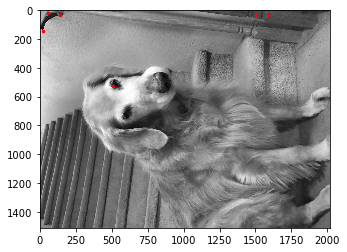

In [121]:
from matplotlib import pyplot as plt
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from PIL import Image

fname = './data/Daisy.jpg'
image_1 = Image.open(fname).convert("L")
arr = np.asarray(image_1)
coords_D = corner_peaks(corner_harris(image_1), min_distance = 10)


fig, ax = plt.subplots()
ax.imshow(arr, cmap = plt.cm.gray)
ax.plot(coords_D[:, 1], coords_D[:, 0], '.r', markersize = 5)
plt.show()

In [122]:
coords_D

array([[  20,   55],
       [  32,  143],
       [  32, 1506],
       [  34, 1586],
       [ 140,   20],
       [ 523,  508]])

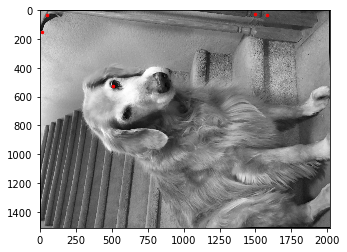

In [123]:
from skimage.transform import rotate

fname = './data/Daisy.jpg'
image_2 = Image.open(fname).convert("L")
arr = np.asarray(image_2)
new_pic = rotate(arr, 0.5)
coords_D_3 = corner_peaks(corner_harris(new_pic), min_distance = 10)

fig, ax = plt.subplots()
ax.imshow(new_pic, cmap = plt.cm.gray)
ax.plot(coords_D_3[:, 1], coords_D_3[:, 0], '.r', markersize = 5)
plt.show()

In [124]:
coords_D_3

array([[  28, 1499],
       [  29,   49],
       [  29, 1580],
       [ 148,   15],
       [ 527,  506]])

In [125]:
cost = cdist(coords_D, coords_D_3)
print(cost)

[[ 1444.02216049    10.81665383  1525.02655715   134.10443691
    678.56466162]
 [ 1356.00589969    94.04786016  1437.00313152   172.74258305
    613.83548285]
 [    8.06225775  1457.00308853    74.06078585  1495.50560012
   1115.80688293]
 [   87.20665112  1537.0081327      7.81024968  1575.13078822
   1187.20217318]
 [ 1483.23464091   114.72575997  1563.94405271     9.43398113   621.2608148 ]
 [ 1107.74816633   674.32707198  1180.34740649   619.41423942
      4.47213595]]


In [126]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 2 3 4 5] [1 0 2 3 4]


In [127]:
coords_D_3_new = coords_D_3[col_ind]
print(coords_D_3_new)

[[  29   49]
 [  28 1499]
 [  29 1580]
 [ 148   15]
 [ 527  506]]


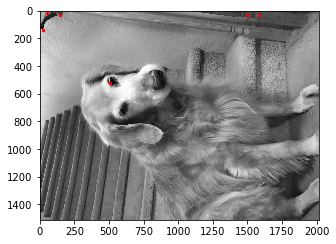

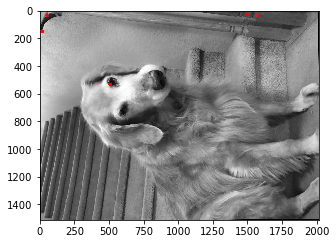

In [128]:
plt.figure(figsize = (5, 5))

plt.imshow(image_1, cmap = plt.cm.gray)
plt.plot(coords_D[:, 1], coords_D[:, 0], '.r', markersize = 5)

plt.figure(figsize = (5, 5))

plt.imshow(new_pic, cmap = plt.cm.gray)
plt.plot(coords_D_3[:, 1], coords_D_3[:, 0], '.r', markersize = 5)
plt.show()

# Hungarian Algorithm Matching - Raw Data

In [129]:
import pandas as pd
import imageio
import matplotlib as mpl
from skimage import measure
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from IPython.display import Image
from scipy.ndimage import imread 

# STEP 1: Read in Tiff Image

The tiff images from each time point will be used as background images in future overlay plots. The tiff image is read in as an rgb image, which means that it will be displayed as a color image if left alone. Since we would like to view the tiff images as gray-scale background images, we must convert each of them to a gray-scale image. 

In [131]:
tp1_image = imread('./data/R04_tp1_substack (17-32)z2.png')

In [132]:
tp2_image = imread('./data/R04_tp2_substack (17-32)z2.png')

In [133]:
tp3_image = imread('./data/R04_tp3_substack (19-34)z2.png')

In [134]:
tp4_image = imread('./data/R04_tp4_substack (20-35)z2.png')

# STEP 2: Read in Centroid Locations for each Time Point 

The centroid locations are stored in csv files, which contain additional information about each annotated synapse. Reading in the csv file as a pandas dataframe will allow us to actually access individual elements of the csv file. For this particular demonstration, we are going to look at four time points of Z-slice = 2. 

### Time Point 1: Z-slice = 2 

In [135]:
tp1_antn = pd.read_csv('./data/a1_tp1.csv')
tp1_antn_2 = tp1_antn[tp1_antn['Z'] == 2]
tp1_antn_2

Index            Name  Type    X    Y  Width  Height Color  Fill  LWidth  \
1        1  0002-0014-0044  Oval   39    9     10      11  none  none       0   
3        3  0002-0030-0032  Oval   28   27      9       7  none  none       0   
4        4  0002-0032-0040  Oval   37   28      7       9  none  none       0   
5        5  0002-0047-0026  Oval   22   43      9       9  none  none       0   
6        6  0002-0070-0027  Oval   24   65      7      10  none  none       0   
7        7  0002-0003-0076  Oval   70    0     12       7  none  none       0   
8        8  0002-0103-0011  Oval    5   99     12       8  none  none       0   
9        9  0002-0104-0039  Oval   35   99      8      10  none  none       0   
10      10  0002-0067-0040  Oval   35   63     10       9  none  none       0   
11      11  0002-0041-0051  Oval   48   37      7       8  none  none       0   
13      13  0002-0183-0003  Oval   -1  178      8      10  none  none       0   
14      14  0002-0172-0015  Oval   12  167      7      10  none  none       0   
15      15  0002-0204-0022  Oval   17  200     11       8  none  none       0   
17      17  0002-0225-0062  Oval   56  220     12      10  none  none       0   
18      18  0002-0239-0045  Oval   40  232     10      14  none  none       0   
19      19  0002-0238-0054  Oval   50  232      9      13  none  none       0   
20      20  0002-0259-0014  Oval   10  254      9      11  none  none       0   
22      22  0002-0309-0008  Oval    1  305     14       9  none  none       0   
23      23  0002-0296-0049  Oval   44  292     10       9  none  none       0   
25      25  0002-0286-0005  Oval    1  280      8      12  none  none       0   
27      27  0002-0323-0004  Oval    0  317      9      12  none  none       0   
30      30  0002-0315-0069  Oval   65  310      8      10  none  none       0   
34      34  0002-0253-0072  Oval   68  247      9      12  none  none       0   
35      35  0002-0242-0065  Oval   59  237     13      10  none  none       0   
36      36  0002-0257-0079  Oval   76  252      7      10  none  none       0   
40      40  0002-0154-0060  Oval   55  150     11       9  none  none       0   
41      41  0002-0074-0090  Oval   84   69     12      11  none  none       0   
42      42  0002-0004-0108  Oval  103    0     11       9  none  none       0   
43      43  0002-0033-0126  Oval  121   29     10       9  none  none       0   
44      44  0002-0041-0119  Oval  115   37      9       9  none  none       0   
..     ...             ...   ...  ...  ...    ...     ...   ...   ...     ...   
170    170  0002-0101-0350  Oval  344   96     13      10  none  none       0   
171    171  0002-0115-0356  Oval  350  109     12      12  none  none       0   
172    172  0002-0134-0356  Oval  350  129     12      11  none  none       0   
173    173  0002-0147-0333  Oval  328  141     11      12  none  none       0   
174    174  0002-0133-0343  Oval  338  124     10      18  none  none       0   
175    175  0002-0152-0078  Oval   68  145     21      14  none  none       0   
176    176  0002-0313-0257  Oval  251  307     12      13  none  none       0   
177    177  0002-0298-0237  Oval  232  295     10       6  none  none       0   
181    181  0002-0352-0292  Oval  286  347     12      11  none  none       0   
182    182  0002-0353-0282  Oval  276  347     12      13  none  none       0   
183    183  0002-0332-0323  Oval  319  327      9      10  none  none       0   
184    184  0002-0329-0338  Oval  334  325      8       9  none  none       0   
186    186  0002-0285-0349  Oval  343  280     12      11  none  none       0   
187    187  0002-0295-0342  Oval  337  291     10       9  none  none       0   
188    188  0002-0302-0299  Oval  295  296      9      13  none  none       0   
189    189  0002-0345-0265  Oval  258  340     15      10  none  none       0   
193    193  0002-0221-0327  Oval  322  216     10      11  none  none       0   
194    194  0002-0243-0355  Oval  35

### Time Point 2: Z-slice = 2

In [136]:
tp2_antn = pd.read_csv('./data/a2_tp2.csv')
tp2_antn_2 = tp2_antn[tp2_antn['Z'] == 2]
tp2_antn_2

Index            Name  Type    X    Y  Width  Height Color  Fill  LWidth  \
0        0  0002-0013-0045  Oval   40    8     11      11  none  none       0   
3        3  0002-0003-0153  Oval  147   -1     12       9  none  none       0   
4        4  0002-0009-0200  Oval  194    5     12       8  none  none       0   
5        5  0002-0029-0032  Oval   26   25     13       9  none  none       0   
7        7  0002-0030-0041  Oval   37   24      9      12  none  none       0   
8        8  0002-0040-0023  Oval   19   34      8      13  none  none       0   
10      10  0002-0047-0010  Oval    5   44     10       7  none  none       0   
11      11  0002-0101-0007  Oval    3   97      9       8  none  none       0   
14      14  0002-0076-0013  Oval    8   71     10      10  none  none       0   
16      16  0002-0162-0017  Oval   12  154     10      16  none  none       0   
17      17  0002-0154-0023  Oval   20  146      7      17  none  none       0   
18      18  0002-0154-0034  Oval   30  149      9      10  none  none       0   
20      20  0002-0207-0046  Oval   39  201     15      12  none  none       0   
21      21  0002-0149-0078  Oval   73  143     10      13  none  none       0   
22      22  0002-0147-0086  Oval   82  141      8      13  none  none       0   
25      25  0002-0204-0026  Oval   22  200      9       8  none  none       0   
26      26  0002-0177-0005  Oval    0  171     11      12  none  none       0   
28      28  0002-0256-0015  Oval   10  252     10       8  none  none       0   
29      29  0002-0281-0013  Oval    7  276     13      10  none  none       0   
30      30  0002-0308-0005  Oval    1  302      9      12  none  none       0   
31      31  0002-0307-0015  Oval   10  302     11      10  none  none       0   
36      36  0002-0331-0076  Oval   71  325     10      12  none  none       0   
37      37  0002-0296-0052  Oval   47  291     11      10  none  none       0   
39      39  0002-0234-0051  Oval   44  229     14      10  none  none       0   
40      40  0002-0199-0115  Oval  108  194     14      11  none  none       0   
41      41  0002-0201-0143  Oval  137  195     12      12  none  none       0   
42      42  0002-0177-0123  Oval  118  172     11      11  none  none       0   
47      47  0002-0042-0123  Oval  117   37     13      10  none  none       0   
52      52  0002-0229-0107  Oval  102  223     10      13  none  none       0   
53      53  0002-0311-0109  Oval  102  307     15       9  none  none       0   
..     ...             ...   ...  ...  ...    ...     ...   ...   ...     ...   
132    132  0002-0330-0327  Oval  321  325     12      11  none  none       0   
133    133  0002-0330-0282  Oval  274  324     16      12  none  none       0   
134    134  0002-0296-0273  Oval  265  288     16      16  none  none       0   
136    136  0002-0180-0291  Oval  285  175     12      10  none  none       0   
139    139  0002-0001-0326  Oval  320   -3     13       8  none  none       0   
142    142  0002-0114-0291  Oval  285  109     12      10  none  none       0   
143    143  0002-0105-0295  Oval  289  101     12       9  none  none       0   
148    148  0002-0082-0342  Oval  337   77     10      10  none  none       0   
149    149  0002-0082-0350  Oval  345   77     10      10  none  none       0   
150    150  0002-0018-0282  Oval  276   13     12      11  none  none       0   
151    151  0002-0048-0335  Oval  329   41     13      14  none  none       0   
154    154  0002-0155-0229  Oval  223  149     13      13  none  none       0   
156    156  0002-0129-0235  Oval  226  124     19      10  none  none       0   
160    160  0002-0186-0328  Oval  321  181     14      11  none  none       0   
164    164  0002-0081-0305  Oval  299   74     12      14  none  none       0   
165    165  0002-0082-0324  Oval  318   77     12      10  none  none       0   
168    168  0002-0314-0324  Oval  317  309     14      10  none  none       0   
169    169  0002-0121-0173  Oval  16

### Time Point 3: Z-slice = 2

In [137]:
tp3_antn = pd.read_csv('./data/a3_tp3.csv')
tp3_antn_2 = tp3_antn[tp3_antn['Z'] == 2]
tp3_antn_2

Index            Name  Type    X    Y  Width  Height Color  Fill  LWidth  \
2        2  0002-0048-0028  Oval   19   43     18      11  none  none       0   
6        6  0002-0089-0034  Oval   27   84     14      10  none  none       0   
7        7  0002-0112-0023  Oval   17  106     13      12  none  none       0   
9        9  0002-0128-0021  Oval   14  122     14      12  none  none       0   
10      10  0002-0101-0021  Oval   14   97     14       9  none  none       0   
13      13  0002-0072-0009  Oval    2   68     14       9  none  none       0   
15      15  0002-0204-0048  Oval   42  199     13      10  none  none       0   
16      16  0002-0215-0046  Oval   40  211     13       9  none  none       0   
17      17  0002-0178-0007  Oval    2  171     10      14  none  none       0   
18      18  0002-0213-0063  Oval   58  205     10      16  none  none       0   
19      19  0002-0115-0091  Oval   85  110     12      10  none  none       0   
20      20  0002-0032-0037  Oval   31   27     13      10  none  none       0   
22      22  0002-0047-0004  Oval   -1   41     10      13  none  none       0   
28      28  0002-0301-0013  Oval    9  296      9      11  none  none       0   
29      29  0002-0290-0053  Oval   48  283     11      14  none  none       0   
31      31  0002-0346-0094  Oval   90  338      9      16  none  none       0   
32      32  0002-0331-0076  Oval   71  325     11      13  none  none       0   
34      34  0002-0255-0018  Oval   13  248     11      14  none  none       0   
39      39  0002-0245-0079  Oval   73  241     13       8  none  none       0   
40      40  0002-0228-0097  Oval   91  221     12      15  none  none       0   
45      45  0002-0248-0151  Oval  147  241      8      15  none  none       0   
46      46  0002-0250-0157  Oval  154  243      7      14  none  none       0   
47      47  0002-0276-0083  Oval   77  271     12      11  none  none       0   
51      51  0002-0285-0126  Oval  121  278     11      14  none  none       0   
53      53  0002-0281-0189  Oval  184  274     11      15  none  none       0   
54      54  0002-0311-0112  Oval  107  305     11      13  none  none       0   
55      55  0002-0315-0132  Oval  123  309     19      12  none  none       0   
65      65  0002-0330-0244  Oval  239  324     10      12  none  none       0   
69      69  0002-0269-0293  Oval  287  264     12      11  none  none       0   
71      71  0002-0349-0291  Oval  285  342     13      15  none  none       0   
..     ...             ...   ...  ...  ...    ...     ...   ...   ...     ...   
161    161  0002-0034-0346  Oval  339   29     15      10  none  none       0   
162    162  0002-0039-0307  Oval  301   32     12      15  none  none       0   
169    169  0002-0019-0238  Oval  229   14     18      10  none  none       0   
170    170  0002-0112-0192  Oval  187  104     11      16  none  none       0   
172    172  0002-0279-0004  Oval   -2  274     12      11  none  none       0   
174    174  0002-0076-0048  Oval   41   70     14      12  none  none       0   
176    176  0002-0044-0240  Oval  235   38     10      12  none  none       0   
177    177  0002-0215-0218  Oval  212  209     13      12  none  none       0   
178    178  0002-0204-0194  Oval  185  199     18      10  none  none       0   
180    180  0002-0220-0154  Oval  148  214     13      12  none  none       0   
182    182  0002-0269-0059  Oval   53  264     12      10  none  none       0   
183    183  0002-0253-0063  Oval   58  247     10      12  none  none       0   
184    184  0002-0264-0030  Oval   25  259     11      10  none  none       0   
185    185  0002-0238-0050  Oval   45  230     10      16  none  none       0   
193    193  0002-0044-0136  Oval  131   40     11       9  none  none       0   
194    194  0002-0100-0006  Oval    1   94     10      12  none  none       0   
195    195  0002-0301-0075  Oval   69  295     12      12  none  none       0   
196    196  0002-0333-0157  Oval  15

### Time Point 4: Z-slice = 2

In [138]:
tp4_antn = pd.read_csv('./data/a4_tp4.csv')
tp4_antn_2 = tp4_antn[tp4_antn['Z'] == 2]
tp4_antn_2

Index            Name  Type    X    Y  Width  Height Color  Fill  LWidth  \
2        2  0002-0054-0026  Oval   22   50      9       9  none  none       0   
3        3  0002-0088-0029  Oval   23   84     13       9  none  none       0   
4        4  0002-0103-0041  Oval   38   99      7       9  none  none       0   
5        5  0002-0117-0089  Oval   85  113      9       9  none  none       0   
6        6  0002-0161-0056  Oval   52  157      8       9  none  none       0   
7        7  0002-0140-0091  Oval   86  135     10      10  none  none       0   
8        8  0002-0194-0061  Oval   57  190      8       8  none  none       0   
9        9  0002-0231-0093  Oval   89  228      8       7  none  none       0   
10      10  0002-0330-0033  Oval   28  327     11       7  none  none       0   
11      11  0002-0336-0031  Oval   27  333      8       7  none  none       0   
12      12  0002-0269-0051  Oval   46  266     10       7  none  none       0   
13      13  0002-0180-0123  Oval  117  176     12       9  none  none       0   
14      14  0002-0037-0035  Oval   30   31     11      13  none  none       0   
15      15  0002-0012-0068  Oval   63    5     11      15  none  none       0   
16      16  0002-0021-0058  Oval   53   17     11       9  none  none       0   
17      17  0002-0072-0088  Oval   83   67     10      11  none  none       0   
19      19  0002-0071-0123  Oval  117   67     12       9  none  none       0   
21      21  0002-0058-0134  Oval  128   53     12      10  none  none       0   
22      22  0002-0090-0148  Oval  142   86     13       8  none  none       0   
24      24  0002-0209-0048  Oval   44  203      9      12  none  none       0   
25      25  0002-0238-0056  Oval   51  232     11      12  none  none       0   
26      26  0002-0217-0059  Oval   55  211      9      13  none  none       0   
27      27  0002-0273-0038  Oval   33  269     11       9  none  none       0   
28      28  0002-0294-0053  Oval   47  290     13       9  none  none       0   
29      29  0002-0251-0097  Oval   92  246     10      11  none  none       0   
34      34  0002-0228-0119  Oval  114  224     10       8  none  none       0   
35      35  0002-0230-0107  Oval  103  225      9      11  none  none       0   
39      39  0002-0188-0102  Oval   96  183     12      10  none  none       0   
40      40  0002-0187-0113  Oval  108  182     10      10  none  none       0   
44      44  0002-0164-0035  Oval   30  160     10       9  none  none       0   
..     ...             ...   ...  ...  ...    ...     ...   ...   ...     ...   
138    138  0002-0262-0119  Oval  114  256     10      12  none  none       0   
139    139  0002-0262-0129  Oval  124  256     10      13  none  none       0   
144    144  0002-0143-0139  Oval  133  136     13      15  none  none       0   
145    145  0002-0121-0216  Oval  211  115     11      13  none  none       0   
147    147  0002-0253-0332  Oval  324  246     17      14  none  none       0   
150    150  0002-0046-0219  Oval  213   41     12      11  none  none       0   
151    151  0002-0111-0122  Oval  115  107     14       9  none  none       0   
152    152  0002-0051-0124  Oval  117   47     14       9  none  none       0   
154    154  0002-0036-0123  Oval  114   31     18      11  none  none       0   
155    155  0002-0030-0148  Oval  140   24     16      13  none  none       0   
161    161  0002-0027-0337  Oval  332   20     11      14  none  none       0   
167    167  0002-0109-0192  Oval  183  104     19      10  none  none       0   
168    168  0002-0136-0189  Oval  182  130     15      12  none  none       0   
170    170  0002-0148-0228  Oval  222  142     13      12  none  none       0   
171    171  0002-0167-0170  Oval  162  160     16      14  none  none       0   
173    173  0002-0302-0260  Oval  254  296     12      12  none  none       0   
177    177  0002-0330-0280  Oval  275  325     11      11  none  none       0   
179    179  0002-0185-0310  Oval  30

# STEP 3: Pre-Hungarian Matching Overlay Plot

For this particular demonstration, we will be using the Hungarian algorithm to match synapses between time point 1 and time point 2. However, we must first **look at the data** to understand which synapses **can** be matched. Only synapses that are located very close to one another in euclidean space across two time points can be matched and viewed as a single synapse.

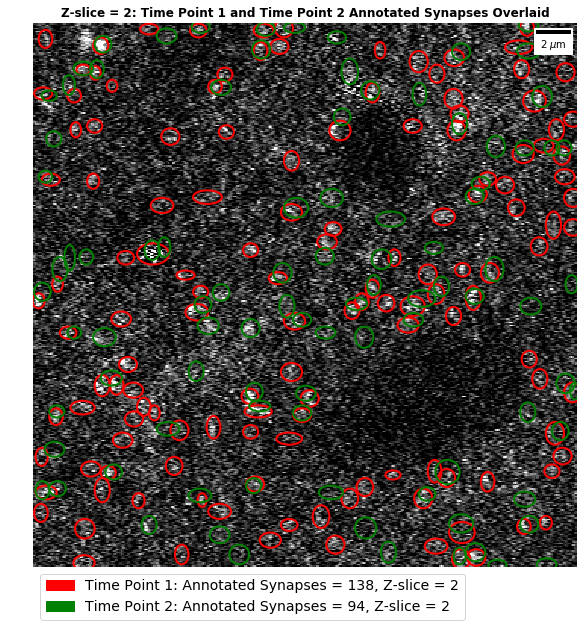

In [139]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title('Z-slice = 2: Time Point 1 and Time Point 2 Annotated Synapses Overlaid', fontweight = 'bold')
ax.imshow(tp1_image, cmap = 'gray')


for idx, row in tp1_antn_2.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp1 = mpl.patches.Ellipse((x,y), width = row['Width'], height = row['Height'], edgecolor = 'r', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp1)
    
    
for idx, row in tp2_antn_2.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp2 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'g', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp2)
    
red_patch = mpl.patches.Patch(color = 'red', label = 'Time Point 1: Annotated Synapses = 138, Z-slice = 2')
green_patch = mpl.patches.Patch(color = 'green', label = 'Time Point 2: Annotated Synapses = 94, Z-slice = 2')
plt.legend(handles = [red_patch, green_patch], bbox_to_anchor = (0, 0), loc = 'upper left', prop = {'size' : 14})
    
scalebar = ScaleBar(0.09, 'um', length_fraction = 0.1, height_fraction = 0.005, color = 'k', border_pad = 0.5)
ax.add_artist(scalebar)
ax.axis('off')

plt.savefig('PNG Figures/TP1_TP2_overlay.png')
plt.show()

# STEP 4: Euclidean Distance Threshold

As stated in ** STEP 3**, we only want to match synapses that have been annotated very close to one another in euclidean space. In this first example, we will look at annotated synapses in time point 2 that are at most 0.3 microns away from annotated synapses in time point 1. 

In [140]:
tp1_centroids_df = tp1_antn_2[['X','Y', 'Width', 'Height']]
tp2_centroids_df = tp2_antn_2[['X', 'Y', 'Width', 'Height']]

In [141]:
tp1_centroids_array = np.asarray(tp1_centroids_df)
tp2_centroids_array = np.asarray(tp2_centroids_df)

In [142]:
tp1_centroids = np.asarray(tp1_antn_2[['X', 'Y']])
tp2_centroids = np.asarray(tp2_antn_2[['X', 'Y']])

In [143]:
cost = cdist(tp1_centroids, tp2_centroids)

In [144]:
indices = np.asarray(np.where(cost <= 3)) # 3 pixels = approximately 0.3 microns
indices.shape

(2, 16)

In [145]:
tp1_ed3pix = pd.DataFrame(tp1_centroids_array[indices[0]])
tp1_ed3pix_final = tp1_ed3pix.rename(index = str, columns = {0 : 'X', 1 : 'Y', 2 : 'Width', 3 : 'Height'})
tp2_ed3pix = pd.DataFrame(tp2_centroids_array[indices[1]])
tp2_ed3pix_final = tp2_ed3pix.rename(index = str, columns = {0 : 'X', 1 : 'Y', 2 : 'Width', 3 : 'Height'})

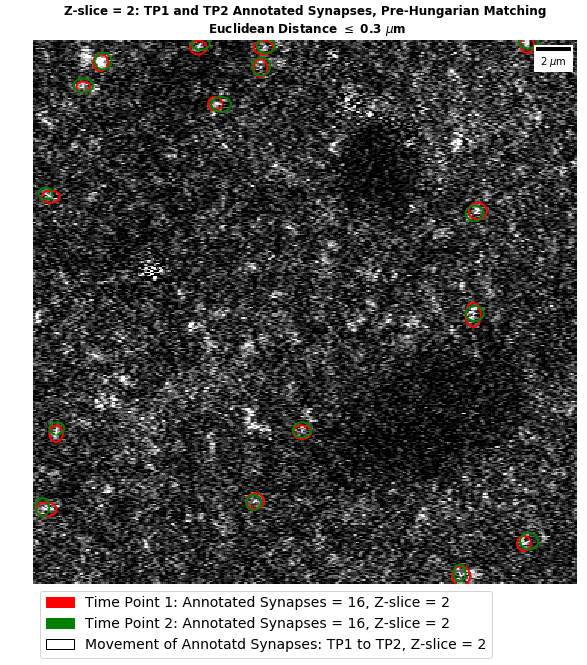

In [146]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title('Z-slice = 2: TP1 and TP2 Annotated Synapses, Pre-Hungarian Matching\n Euclidean Distance $\leq$ 0.3 $\mu$m', fontweight = 'bold')
ax.imshow(tp1_image, cmap = 'gray')
plt.autoscale(False)

for idx, row in tp1_ed3pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp1 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'r', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp1)
    
    
for idx, row in tp2_ed3pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp2 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'g', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp2)
 
    
for i in range(len(tp1_centroids[indices[0]])):
    x1 = tp1_centroids[indices[0]][:, 0][i] + tp1_centroids_array[indices[0]][:, 2][i]/2
    y1 = tp1_centroids[indices[0]][:, 1][i] + tp1_centroids_array[indices[0]][:, 3][i]/2
    plt.scatter(x1, y1, color = 'red', alpha = 0.0)
    x2 = tp2_centroids[indices[1]][:, 0][i] + tp2_centroids_array[indices[1]][:, 2][i]/2
    y2 = tp2_centroids[indices[1]][:, 1][i] + tp2_centroids_array[indices[1]][:, 3][i]/2
    plt.scatter(x2, y2, color = 'green', alpha = 0.0)
    plt.plot([x1, x2], [y1, y2], color = 'white')
    
red_patch = mpl.patches.Patch(color = 'red', label = 'Time Point 1: Annotated Synapses = 16, Z-slice = 2')
green_patch = mpl.patches.Patch(color = 'green', label = 'Time Point 2: Annotated Synapses = 16, Z-slice = 2')
white_patch = mpl.patches.Patch(facecolor = 'white', edgecolor = 'black', label = 'Movement of Annotatd Synapses: TP1 to TP2, Z-slice = 2' )
plt.legend(handles = [red_patch, green_patch, white_patch], bbox_to_anchor = (0, 0), loc = 'upper left', prop = {'size' : 14})
    
scalebar = ScaleBar(0.09, 'um', length_fraction = 0.1, height_fraction = 0.005, color = 'k', border_pad = 0.5)
ax.add_artist(scalebar)
ax.axis('off')

plt.savefig('PNG Figures/TP1_TP2_dis3_Pre-Hungarian.png')
plt.show()

# STEP 5: Compute Average Length of Lines - Before Hungarian Matching

The only way to compute some sort of quantitative metric by which we can judge the performance of the Hungarian algorithm is to compute the length of lines connecting annotated synapses in time point 1 with annotated synapses in time point 2 that are at most 0.3 microns away from annotated synapses in time point 1. 

In [147]:
def line_length():
    line_lengths = []
    for i in range(len(tp1_centroids[indices[0]])):
        x1 = tp1_centroids[indices[0]][:, 0][i]
        y1 = tp1_centroids[indices[0]][:, 1][i]
        x2 = tp2_centroids[indices[1]][:, 0][i]
        y2 = tp2_centroids[indices[1]][:, 1][i]
        lengths = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        line_lengths.append(lengths)
    return line_lengths

In [148]:
line_length()

[1.4142135623730951,
 2.8284271247461903,
 2.8284271247461903,
 2.0,
 3.0,
 2.2360679774997898,
 2.0,
 1.4142135623730951,
 2.2360679774997898,
 1.0,
 2.0,
 2.8284271247461903,
 2.0,
 1.0,
 1.4142135623730951,
 2.8284271247461903]

In [149]:
prehungarian_length_microns = np.average(np.asarray(line_length()))*0.09

In [150]:
print('Average length of the lines connecting annotated synapses in TP1 and annotated synapses in TP2 is: %f microns.' % prehungarian_length_microns)

Average length of the lines connecting annotated synapses in TP1 and annotated synapses in TP2 is: 0.185785 microns.


# STEP 6: Apply Hungarian Algorithm to Points Remaining after Thresholding

In [151]:
cost = cdist(tp1_centroids[indices[0]], tp2_centroids[indices[1]])

In [152]:
row_ind, col_ind = linear_sum_assignment(cost)

In [153]:
tp2_centroids_final = tp2_centroids[indices[1]][col_ind]
tp2_centroids_final.shape

(16, 2)

In [154]:
tp2_centroids_final == tp2_ed3pix_final[['X', 'Y']] 

X     Y
0   True  True
1   True  True
2   True  True
3   True  True
4   True  True
5   True  True
6   True  True
7   True  True
8   True  True
9   True  True
10  True  True
11  True  True
12  True  True
13  True  True
14  True  True
15  True  True

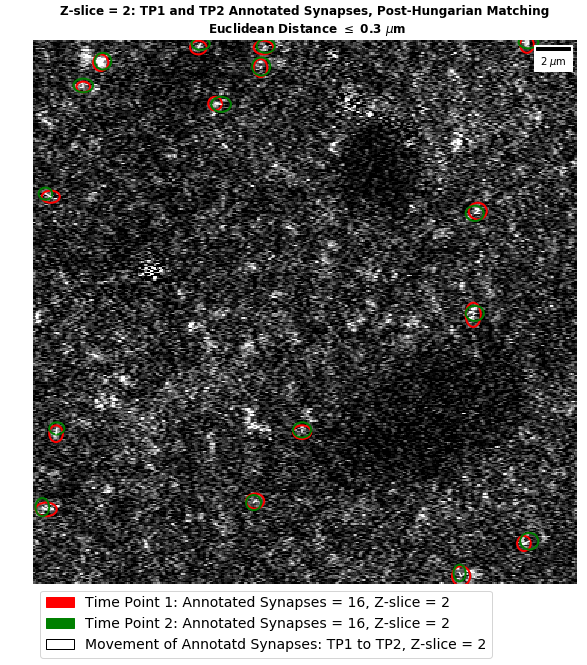

In [155]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title('Z-slice = 2: TP1 and TP2 Annotated Synapses, Post-Hungarian Matching\n Euclidean Distance $\leq$ 0.3 $\mu$m', fontweight = 'bold')
ax.imshow(tp1_image, cmap = 'gray')
plt.autoscale(False)

for idx, row in tp1_ed3pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp1 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'r', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp1)
    
    
for idx, row in tp2_ed3pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp2 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'g', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp2)
 
    
for i in range(len(tp1_centroids[indices[0]])):
    x1 = tp1_centroids[indices[0]][:, 0][i] + tp1_centroids_array[indices[0]][:, 2][i]/2
    y1 = tp1_centroids[indices[0]][:, 1][i] + tp1_centroids_array[indices[0]][:, 3][i]/2
    plt.scatter(x1, y1, color = 'red', alpha = 0.0)
    x2 = tp2_centroids_final[:, 0][i] + tp2_centroids_array[indices[1]][:, 2][i]/2
    y2 = tp2_centroids_final[:, 1][i] + tp2_centroids_array[indices[1]][:, 3][i]/2
    plt.scatter(x2, y2, color = 'green', alpha = 0.0)
    plt.plot([x1, x2], [y1, y2], color = 'white')
    
red_patch = mpl.patches.Patch(color = 'red', label = 'Time Point 1: Annotated Synapses = 16, Z-slice = 2')
green_patch = mpl.patches.Patch(color = 'green', label = 'Time Point 2: Annotated Synapses = 16, Z-slice = 2')
white_patch = mpl.patches.Patch(facecolor = 'white', edgecolor = 'black', label = 'Movement of Annotatd Synapses: TP1 to TP2, Z-slice = 2' )
plt.legend(handles = [red_patch, green_patch, white_patch], bbox_to_anchor = (0, 0), loc = 'upper left', prop = {'size' : 14})
    
scalebar = ScaleBar(0.09, 'um', length_fraction = 0.1, height_fraction = 0.005, color = 'k', border_pad = 0.5)
ax.add_artist(scalebar)
ax.axis('off')

plt.savefig('PNG Figures/TP1_TP2_dis3_Post-Hungarian.png')
plt.show()

# STEP 7: Compute Average Length of Lines - After Hungarian Matching

In [156]:
def line_length():
    line_lengths = []
    for i in range(len(tp1_centroids[indices[0]])):
        x1 = tp1_centroids[indices[0]][:, 0][i]
        y1 = tp1_centroids[indices[0]][:, 1][i]
        x2 = tp2_centroids_final[:, 0][i]
        y2 = tp2_centroids_final[:, 1][i]
        lengths = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        line_lengths.append(lengths)
    return line_lengths

In [157]:
line_length()

[1.4142135623730951,
 2.8284271247461903,
 2.8284271247461903,
 2.0,
 3.0,
 2.2360679774997898,
 2.0,
 1.4142135623730951,
 2.2360679774997898,
 1.0,
 2.0,
 2.8284271247461903,
 2.0,
 1.0,
 1.4142135623730951,
 2.8284271247461903]

In [158]:
posthungarian_length_microns = np.average(np.asarray(line_length()))*0.09

In [159]:
print('Average length of the lines connecting annotated synapses in TP1 and annotated synapses in TP2 is: %f microns.' % posthungarian_length_microns)

Average length of the lines connecting annotated synapses in TP1 and annotated synapses in TP2 is: 0.185785 microns.


# Hungarian Algorithm Tracking - Raw Data

The example below will track annotated synapses across all four given time points that are at most 0.5 micrometers away from annotated synapses in time point 1. 

## Pre-Hungarian Matching

In [160]:
tp1_centroids_df = tp1_antn_2[['X', 'Y', 'Width', 'Height']]
tp2_centroids_df = tp2_antn_2[['X', 'Y', 'Width', 'Height']]
tp3_centroids_df = tp3_antn_2[['X', 'Y', 'Width', 'Height']]
tp4_centroids_df = tp4_antn_2[['X', 'Y', 'Width', 'Height']]

In [161]:
tp1_centroids_array = np.asarray(tp1_centroids_df)
tp2_centroids_array = np.asarray(tp2_centroids_df)
tp3_centroids_array = np.asarray(tp3_centroids_df)
tp4_centroids_array = np.asarray(tp4_centroids_df)

In [162]:
tp1_centroids = np.asarray(tp1_antn_2[['X', 'Y']])
tp2_centroids = np.asarray(tp2_antn_2[['X', 'Y']])
tp3_centroids = np.asarray(tp3_antn_2[['X', 'Y']])
tp4_centroids = np.asarray(tp4_antn_2[['X', 'Y']])

In [163]:
cost_tp1_tp2 = cdist(tp1_centroids, tp2_centroids)
cost_tp1_tp3 = cdist(tp1_centroids, tp3_centroids)
cost_tp1_tp4 = cdist(tp1_centroids, tp4_centroids)

In [164]:
indices_tp1_tp2 = np.asarray(np.where(cost_tp1_tp2 <= 5.5)) # 5.5 pixels = approximately 0.5 microns
indices_tp1_tp3 = np.asarray(np.where(cost_tp1_tp3 <= 5.5))
indices_tp1_tp4 = np.asarray(np.where(cost_tp1_tp4 <= 5.5))

In [165]:
tp2_ed5pix = pd.DataFrame(tp2_centroids_array[indices_tp1_tp2[1]])
tp2_ed5pix_final = tp2_ed5pix.rename(index = str, columns = {0 : 'X', 1 : 'Y', 2 : 'Width', 3 : 'Height'})

tp3_ed5pix = pd.DataFrame(tp3_centroids_array[indices_tp1_tp3[1]])
tp3_ed5pix_final = tp3_ed5pix.rename(index = str, columns = {0 : 'X', 1 : 'Y', 2 : 'Width', 3 : 'Height'})

tp4_ed5pix = pd.DataFrame(tp4_centroids_array[indices_tp1_tp4[1]])
tp4_ed5pix_final = tp4_ed5pix.rename(index = str, columns = {0 : 'X', 1 : 'Y', 2 : 'Width', 3 : 'Height'})

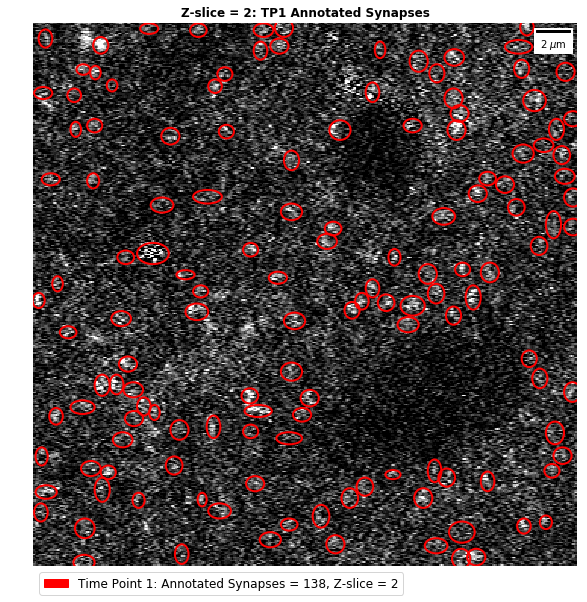

In [166]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title('Z-slice = 2: TP1 Annotated Synapses', fontweight = 'bold')
ax.imshow(tp1_image, cmap = 'gray')
plt.autoscale(False)

for idx, row in tp1_centroids_df.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp1 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'r', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp1)

red_patch = mpl.patches.Patch(color = 'red', label = 'Time Point 1: Annotated Synapses = 138, Z-slice = 2')

plt.legend(handles = [red_patch], bbox_to_anchor = (0, 0), loc = 'upper left', prop = {'size' : 12})
    
scalebar = ScaleBar(0.09, 'um', length_fraction = 0.1, height_fraction = 0.005, color = 'k', border_pad = 0.5)
ax.add_artist(scalebar)
ax.axis('off')

plt.savefig('PNG Figures/TP1_tracking_Pre-Hungarian.png')
plt.show()

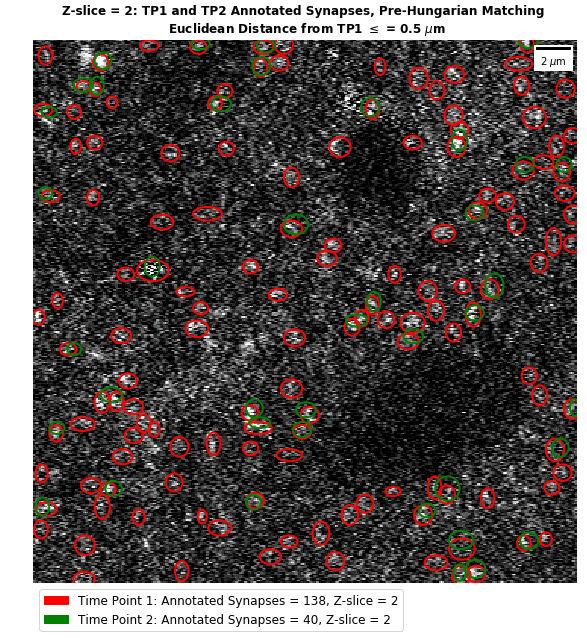

In [167]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title('Z-slice = 2: TP1 and TP2 Annotated Synapses, Pre-Hungarian Matching \n Euclidean Distance from TP1 $\leq$ = 0.5 $\mu$m', fontweight = 'bold')
ax.imshow(tp1_image, cmap = 'gray')
plt.autoscale(False)

for idx, row in tp1_centroids_df.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp1 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'r', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp1)
    
for idx, row in tp2_ed5pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp2 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'g', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp2)
    
red_patch = mpl.patches.Patch(color = 'red', label = 'Time Point 1: Annotated Synapses = 138, Z-slice = 2')
green_patch = mpl.patches.Patch(color = 'green', label = 'Time Point 2: Annotated Synapses = 40, Z-slice = 2')

plt.legend(handles = [red_patch, green_patch], bbox_to_anchor = (0, 0), loc = 'upper left', prop = {'size' : 12})
    
scalebar = ScaleBar(0.09, 'um', length_fraction = 0.1, height_fraction = 0.005, color = 'k', border_pad = 0.5)
ax.add_artist(scalebar)
ax.axis('off')

plt.savefig('PNG Figures/TP1_TP2_tracking_Pre-Hungarian.png')
plt.show()

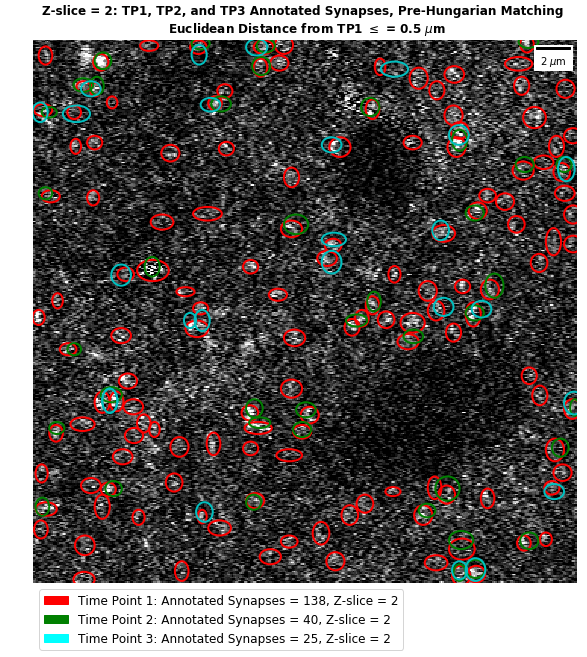

In [168]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title('Z-slice = 2: TP1, TP2, and TP3 Annotated Synapses, Pre-Hungarian Matching \n Euclidean Distance from TP1 $\leq$ = 0.5 $\mu$m', fontweight = 'bold')
ax.imshow(tp1_image, cmap = 'gray')
plt.autoscale(False)

for idx, row in tp1_centroids_df.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp1 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'r', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp1)
    
for idx, row in tp2_ed5pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp2 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'g', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp2)
    
for idx, row in tp3_ed5pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp3 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'c', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp3)
    
red_patch = mpl.patches.Patch(color = 'red', label = 'Time Point 1: Annotated Synapses = 138, Z-slice = 2')
green_patch = mpl.patches.Patch(color = 'green', label = 'Time Point 2: Annotated Synapses = 40, Z-slice = 2')
cyan_patch = mpl.patches.Patch(color = 'cyan', label = 'Time Point 3: Annotated Synapses = 25, Z-slice = 2')

plt.legend(handles = [red_patch, green_patch, cyan_patch], bbox_to_anchor = (0, 0), loc = 'upper left', prop = {'size' : 12})
    
scalebar = ScaleBar(0.09, 'um', length_fraction = 0.1, height_fraction = 0.005, color = 'k', border_pad = 0.5)
ax.add_artist(scalebar)
ax.axis('off')

plt.savefig('PNG Figures/TP1_TP2_TP3_tracking_Pre-Hungarian.png')
plt.show()

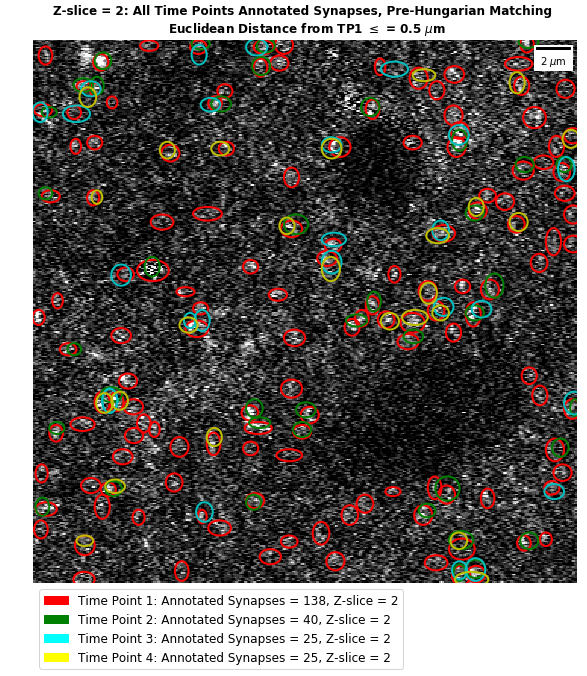

In [169]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title('Z-slice = 2: All Time Points Annotated Synapses, Pre-Hungarian Matching \n Euclidean Distance from TP1 $\leq$ = 0.5 $\mu$m', fontweight = 'bold')
ax.imshow(tp1_image, cmap = 'gray')
plt.autoscale(False)

for idx, row in tp1_centroids_df.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp1 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'r', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp1)
    
for idx, row in tp2_ed5pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp2 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'g', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp2)
    
for idx, row in tp3_ed5pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp3 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'c', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp3)
    
for idx, row in tp4_ed5pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2 
    elps_tp4 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'y', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp4)

red_patch = mpl.patches.Patch(color = 'red', label = 'Time Point 1: Annotated Synapses = 138, Z-slice = 2')
green_patch = mpl.patches.Patch(color = 'green', label = 'Time Point 2: Annotated Synapses = 40, Z-slice = 2')
cyan_patch = mpl.patches.Patch(color = 'cyan', label = 'Time Point 3: Annotated Synapses = 25, Z-slice = 2')
yellow_patch = mpl.patches.Patch(color = 'yellow', label = 'Time Point 4: Annotated Synapses = 25, Z-slice = 2')
plt.legend(handles = [red_patch, green_patch, cyan_patch, yellow_patch], bbox_to_anchor = (0, 0), loc = 'upper left', prop = {'size' : 12})
    
scalebar = ScaleBar(0.09, 'um', length_fraction = 0.1, height_fraction = 0.005, color = 'k', border_pad = 0.5)
ax.add_artist(scalebar)
ax.axis('off')

plt.savefig('PNG Figures/TP1_TP2_TP3_TP4_tracking_Pre-Hungarian.png')
plt.show()

## Post-Hungarian Matching

In [170]:
cost_htp1_tp2 = cdist(tp1_centroids[indices_tp1_tp2[0]], tp2_centroids[indices_tp1_tp2[1]])
cost_htp1_tp3 = cdist(tp1_centroids[indices_tp1_tp3[0]], tp3_centroids[indices_tp1_tp3[1]])
cost_htp1_tp4 = cdist(tp1_centroids[indices_tp1_tp4[0]], tp4_centroids[indices_tp1_tp4[1]])

In [171]:
row_ind, col_ind_12 = linear_sum_assignment(cost_htp1_tp2)
row_ind, col_ind_13 = linear_sum_assignment(cost_htp1_tp3)
row_ind, col_ind_14 = linear_sum_assignment(cost_htp1_tp4)

In [172]:
tp2_centroids_final = tp2_centroids[indices_tp1_tp2[1]][col_ind_12]
tp3_centroids_final = tp3_centroids[indices_tp1_tp3[1]][col_ind_13]
tp4_centroids_final = tp4_centroids[indices_tp1_tp4[1]][col_ind_14]

In [173]:
tp2_centroids_final == tp2_ed5pix_final[['X', 'Y']]

X     Y
0   True  True
1   True  True
2   True  True
3   True  True
4   True  True
5   True  True
6   True  True
7   True  True
8   True  True
9   True  True
10  True  True
11  True  True
12  True  True
13  True  True
14  True  True
15  True  True
16  True  True
17  True  True
18  True  True
19  True  True
20  True  True
21  True  True
22  True  True
23  True  True
24  True  True
25  True  True
26  True  True
27  True  True
28  True  True
29  True  True
30  True  True
31  True  True
32  True  True
33  True  True
34  True  True
35  True  True
36  True  True
37  True  True
38  True  True
39  True  True

In [174]:
tp3_centroids_final == tp3_ed5pix_final[['X', 'Y']]

X     Y
0   True  True
1   True  True
2   True  True
3   True  True
4   True  True
5   True  True
6   True  True
7   True  True
8   True  True
9   True  True
10  True  True
11  True  True
12  True  True
13  True  True
14  True  True
15  True  True
16  True  True
17  True  True
18  True  True
19  True  True
20  True  True
21  True  True
22  True  True
23  True  True
24  True  True

In [175]:
tp4_centroids_final == tp4_ed5pix_final[['X', 'Y']]

X     Y
0   True  True
1   True  True
2   True  True
3   True  True
4   True  True
5   True  True
6   True  True
7   True  True
8   True  True
9   True  True
10  True  True
11  True  True
12  True  True
13  True  True
14  True  True
15  True  True
16  True  True
17  True  True
18  True  True
19  True  True
20  True  True
21  True  True
22  True  True
23  True  True
24  True  True

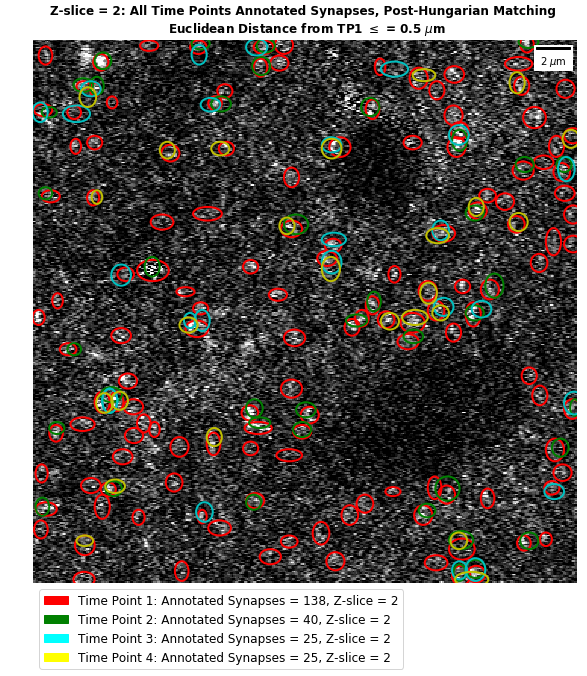

In [176]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title('Z-slice = 2: All Time Points Annotated Synapses, Post-Hungarian Matching \n Euclidean Distance from TP1 $\leq$ = 0.5 $\mu$m', fontweight = 'bold')
ax.imshow(tp1_image, cmap = 'gray')
plt.autoscale(False)

for idx, row in tp1_centroids_df.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp1 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'r', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp1)
    
for idx, row in tp2_ed5pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp2 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'g', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp2)
    
for idx, row in tp3_ed5pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2
    elps_tp3 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'c', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp3)
    
for idx, row in tp4_ed5pix_final.iterrows():
    x = row['X'] + row['Width']/2
    y = row['Y'] + row['Height']/2 
    elps_tp4 = mpl.patches.Ellipse((x, y), width = row['Width'], height = row['Height'], edgecolor = 'y', lw = 2, facecolor = 'none')
    ax.add_patch(elps_tp4)

red_patch = mpl.patches.Patch(color = 'red', label = 'Time Point 1: Annotated Synapses = 138, Z-slice = 2')
green_patch = mpl.patches.Patch(color = 'green', label = 'Time Point 2: Annotated Synapses = 40, Z-slice = 2')
cyan_patch = mpl.patches.Patch(color = 'cyan', label = 'Time Point 3: Annotated Synapses = 25, Z-slice = 2')
yellow_patch = mpl.patches.Patch(color = 'yellow', label = 'Time Point 4: Annotated Synapses = 25, Z-slice = 2')
plt.legend(handles = [red_patch, green_patch, cyan_patch, yellow_patch], bbox_to_anchor = (0, 0), loc = 'upper left', prop = {'size' : 12})
    
scalebar = ScaleBar(0.09, 'um', length_fraction = 0.1, height_fraction = 0.005, color = 'k', border_pad = 0.5)
ax.add_artist(scalebar)
ax.axis('off')

plt.savefig('PNG Figures/TP1_TP2_TP3_TP4_tracking_Post-Hungarian.png')
plt.show()

In [177]:
filenames = ['PNG Figures/TP1_tracking_Pre-Hungarian.png',
             'PNG Figures/TP1_TP2_tracking_Pre-Hungarian.png',
             'PNG Figures/TP1_TP2_TP3_tracking_Pre-Hungarian.png',
             'PNG Figures/TP1_TP2_TP3_TP4_tracking_Post-Hungarian.png']
images = []

for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('PNG Figures/Post-Hungarian_tracking.gif', images, duration = 1)